In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast

def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

path = 'C:\\Users\\sin00\\Downloads\\ecg_dataset\\'
sampling_rate=100

Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

X = load_raw_data(Y, sampling_rate, path)

agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [9]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming X and Y are your original data
print("삭제 전 X의 데이터 개수:", X.shape[0])
print("삭제 전 Y의 데이터 개수:", Y.shape[0])
print("삭제 전 X의 shape:", X.shape)
print("삭제 전 Y의 shape:", Y.shape)

print('\n')

# Find indices where Y['diagnostic_superclass'] is an empty list '[]'
empty_indices = Y[Y['diagnostic_superclass'].apply(lambda x: len(x) == 0)].index

# Remove corresponding rows from Y and X
Y = Y.drop(empty_indices)
X = np.delete(X, empty_indices, axis=0)

# 출력 Y와 X 데이터의 shape
print("삭제 후 Y 데이터의 shape:", Y.shape)
print("삭제 후 X 데이터의 shape:", X.shape)

# 출력 Y와 X 데이터의 개수
print("삭제 후 Y 데이터의 개수:", len(Y))
print("삭제 후 X 데이터의 개수:", len(X))

삭제 전 X의 데이터 개수: 21837
삭제 전 Y의 데이터 개수: 21837
삭제 전 X의 shape: (21837, 1000, 12)
삭제 전 Y의 shape: (21837, 28)
삭제 후 Y 데이터의 shape: (21430, 28)
삭제 후 X 데이터의 shape: (21430, 1000, 12)
삭제 후 Y 데이터의 개수: 21430
삭제 후 X 데이터의 개수: 21430


In [10]:
# Split data into train, validation, and test
test_fold = 10
validation_fold = 9

# Test
X_test = X[Y.strat_fold == test_fold]
y_test = Y[Y.strat_fold == test_fold]['diagnostic_superclass']

# Validation
X_validation = X[Y.strat_fold == validation_fold]
y_validation = Y[Y.strat_fold == validation_fold]['diagnostic_superclass']

# Train
X_train = X[(Y.strat_fold != test_fold) & (Y.strat_fold != validation_fold)]
y_train = Y[(Y.strat_fold != test_fold) & (Y.strat_fold != validation_fold)]['diagnostic_superclass']

# Convert labels to binary format
mlb = MultiLabelBinarizer()
y_train_bin = mlb.fit_transform(y_train)
y_test_bin = mlb.transform(y_test)
y_validation_bin = mlb.transform(y_validation)

# Print data counts and shapes
print("X_train의 데이터 개수:", X_train.shape[0])
print("y_train의 데이터 개수:", y_train.shape[0])
print("X_train의 shape:", X_train.shape)
print("y_train의 shape:", y_train.shape)
print('\n')

print("X_validation의 데이터 개수:", X_validation.shape[0])
print("y_validation의 데이터 개수:", y_validation.shape[0])
print("X_validation의 shape:", X_validation.shape)
print("y_validation의 shape:", y_validation.shape)
print('\n')

print("X_test의 데이터 개수:", X_test.shape[0])
print("y_test의 데이터 개수:", y_test.shape[0])
print("X_test의 shape:", X_test.shape)
print("y_test의 shape:", y_test.shape)
print('\n')

print("y_train_bin shape:", y_train_bin.shape)
print("y_test_bin shape:", y_test_bin.shape)
print("y_validation_bin shape:", y_validation_bin.shape)


X_train의 데이터 개수: 17111
y_train의 데이터 개수: 17111
X_train의 shape: (17111, 1000, 12)
y_train의 shape: (17111,)


X_validation의 데이터 개수: 2156
y_validation의 데이터 개수: 2156
X_validation의 shape: (2156, 1000, 12)
y_validation의 shape: (2156,)


X_test의 데이터 개수: 2163
y_test의 데이터 개수: 2163
X_test의 shape: (2163, 1000, 12)
y_test의 shape: (2163,)


y_train_bin shape: (17111, 5)
y_test_bin shape: (2163, 5)
y_validation_bin shape: (2156, 5)


In [11]:
class_names = ['NORM', 'CD', 'MI', 'STTC', 'HYP']

num_classes = y_train_bin.shape[1]

num_channels = 12  # Assuming you have 12 ECG leads
print("num_channels:", num_channels)

ECG_sequence_length = X_train.shape[1]

ECG_channels = X_train.shape[2]

input_channels = 12
print("input_channels:", input_channels)

input_sequence_length = ECG_sequence_length

input_length = 1000

input_shape = (1000, 12)

batch_size = 64

print("class_names:", class_names)
print("num_classes:", num_classes)
print("ECG_sequence_length:", ECG_sequence_length)
print("ECG_channels:", ECG_channels)
print("input_sequence_length:", input_sequence_length)
print("input_length:", input_length)
print("input_shape:", input_shape)
print("batch_size:", batch_size)

num_channels: 12
input_channels: 12
class_names: ['NORM', 'CD', 'MI', 'STTC', 'HYP']
num_classes: 5
ECG_sequence_length: 1000
ECG_channels: 12
input_sequence_length: 1000
input_length: 1000
input_shape: (1000, 12)
batch_size: 64


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Concatenate, Flatten, Dense
from tensorflow.keras.models import Model

def inception_module(inputs, filters, activation):
    conv1x1_1 = Conv1D(filters[0], 1, activation=activation, padding='same')(inputs)
    
    conv1x1_2 = Conv1D(filters[1], 1, activation=activation, padding='same')(inputs)
    conv3x3 = Conv1D(filters[2], 3, activation=activation, padding='same')(conv1x1_2)
    
    conv1x1_3 = Conv1D(filters[3], 1, activation=activation, padding='same')(inputs)
    conv5x5 = Conv1D(filters[4], 5, activation=activation, padding='same')(conv1x1_3)
    
    maxpool = MaxPooling1D(3, strides=1, padding='same')(inputs)
    conv1x1_4 = Conv1D(filters[5], 1, activation=activation, padding='same')(maxpool)
    
    inception_output = Concatenate(axis=-1)([conv1x1_1, conv3x3, conv5x5, conv1x1_4])
    return inception_output

def create_inception_cnn_model_with_batchnorm(input_shape, num_classes, num_cnn_layers, num_cnn_kernels, cnn_kernel_size,
                                              num_dense_layers, num_dense_units, batch_size, learning_rate, activation, optimizer):
    inputs = Input(shape=input_shape)
    
    x = Conv1D(num_cnn_kernels[0], cnn_kernel_size[0], activation=activation, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    for i in range(1, num_cnn_layers):
        x = Conv1D(num_cnn_kernels[i], cnn_kernel_size[i], activation=activation, padding='same')(x)
        x = MaxPooling1D(2, strides=2)(x)
        x = tf.keras.layers.BatchNormalization()(x)
    
    inception_filters = [num_cnn_kernels[num_cnn_layers - 1]] * 6
    x = inception_module(x, inception_filters, activation)
    
    x = Flatten()(x)
    for i in range(num_dense_layers):
        x = Dense(num_dense_units[i], activation=activation)(x)
        x = tf.keras.layers.BatchNormalization()(x)
    
    outputs = Dense(num_classes, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

num_cnn_layers = 4
num_cnn_kernels = [32, 128, 64, 64]
cnn_kernel_size = [7, 5, 7, 5]
num_dense_layers = 2
num_dense_units = [128, 128]
batch_size = 64
learning_rate = 0.0011
activation = 'gelu'
optimizer = tf.keras.optimizers.Adam

# Create your model with batch normalization
model_with_batchnorm = create_inception_cnn_model_with_batchnorm(input_shape, num_classes, num_cnn_layers, num_cnn_kernels, cnn_kernel_size,
                                                                 num_dense_layers, num_dense_units, batch_size, learning_rate, activation, optimizer)

clip_norm_value = 1.0  #(Adjust to an appropriate value)
optimizer_with_clipping = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=clip_norm_value)

model_with_batchnorm.compile(optimizer=optimizer_with_clipping, loss='binary_crossentropy', metrics=['accuracy'])

In [32]:

# Set the name of the model
model_with_batchnorm._name = "inception_cnn_model_with_batchnorm"

# Display the model summary
model_with_batchnorm.summary()

Model: "inception_cnn_model_with_batchnorm"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1000, 12)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 1000, 32)             2720      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 1000, 32)             128       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv1d_1 (Conv1D)           (None, 1000, 128)            20608  

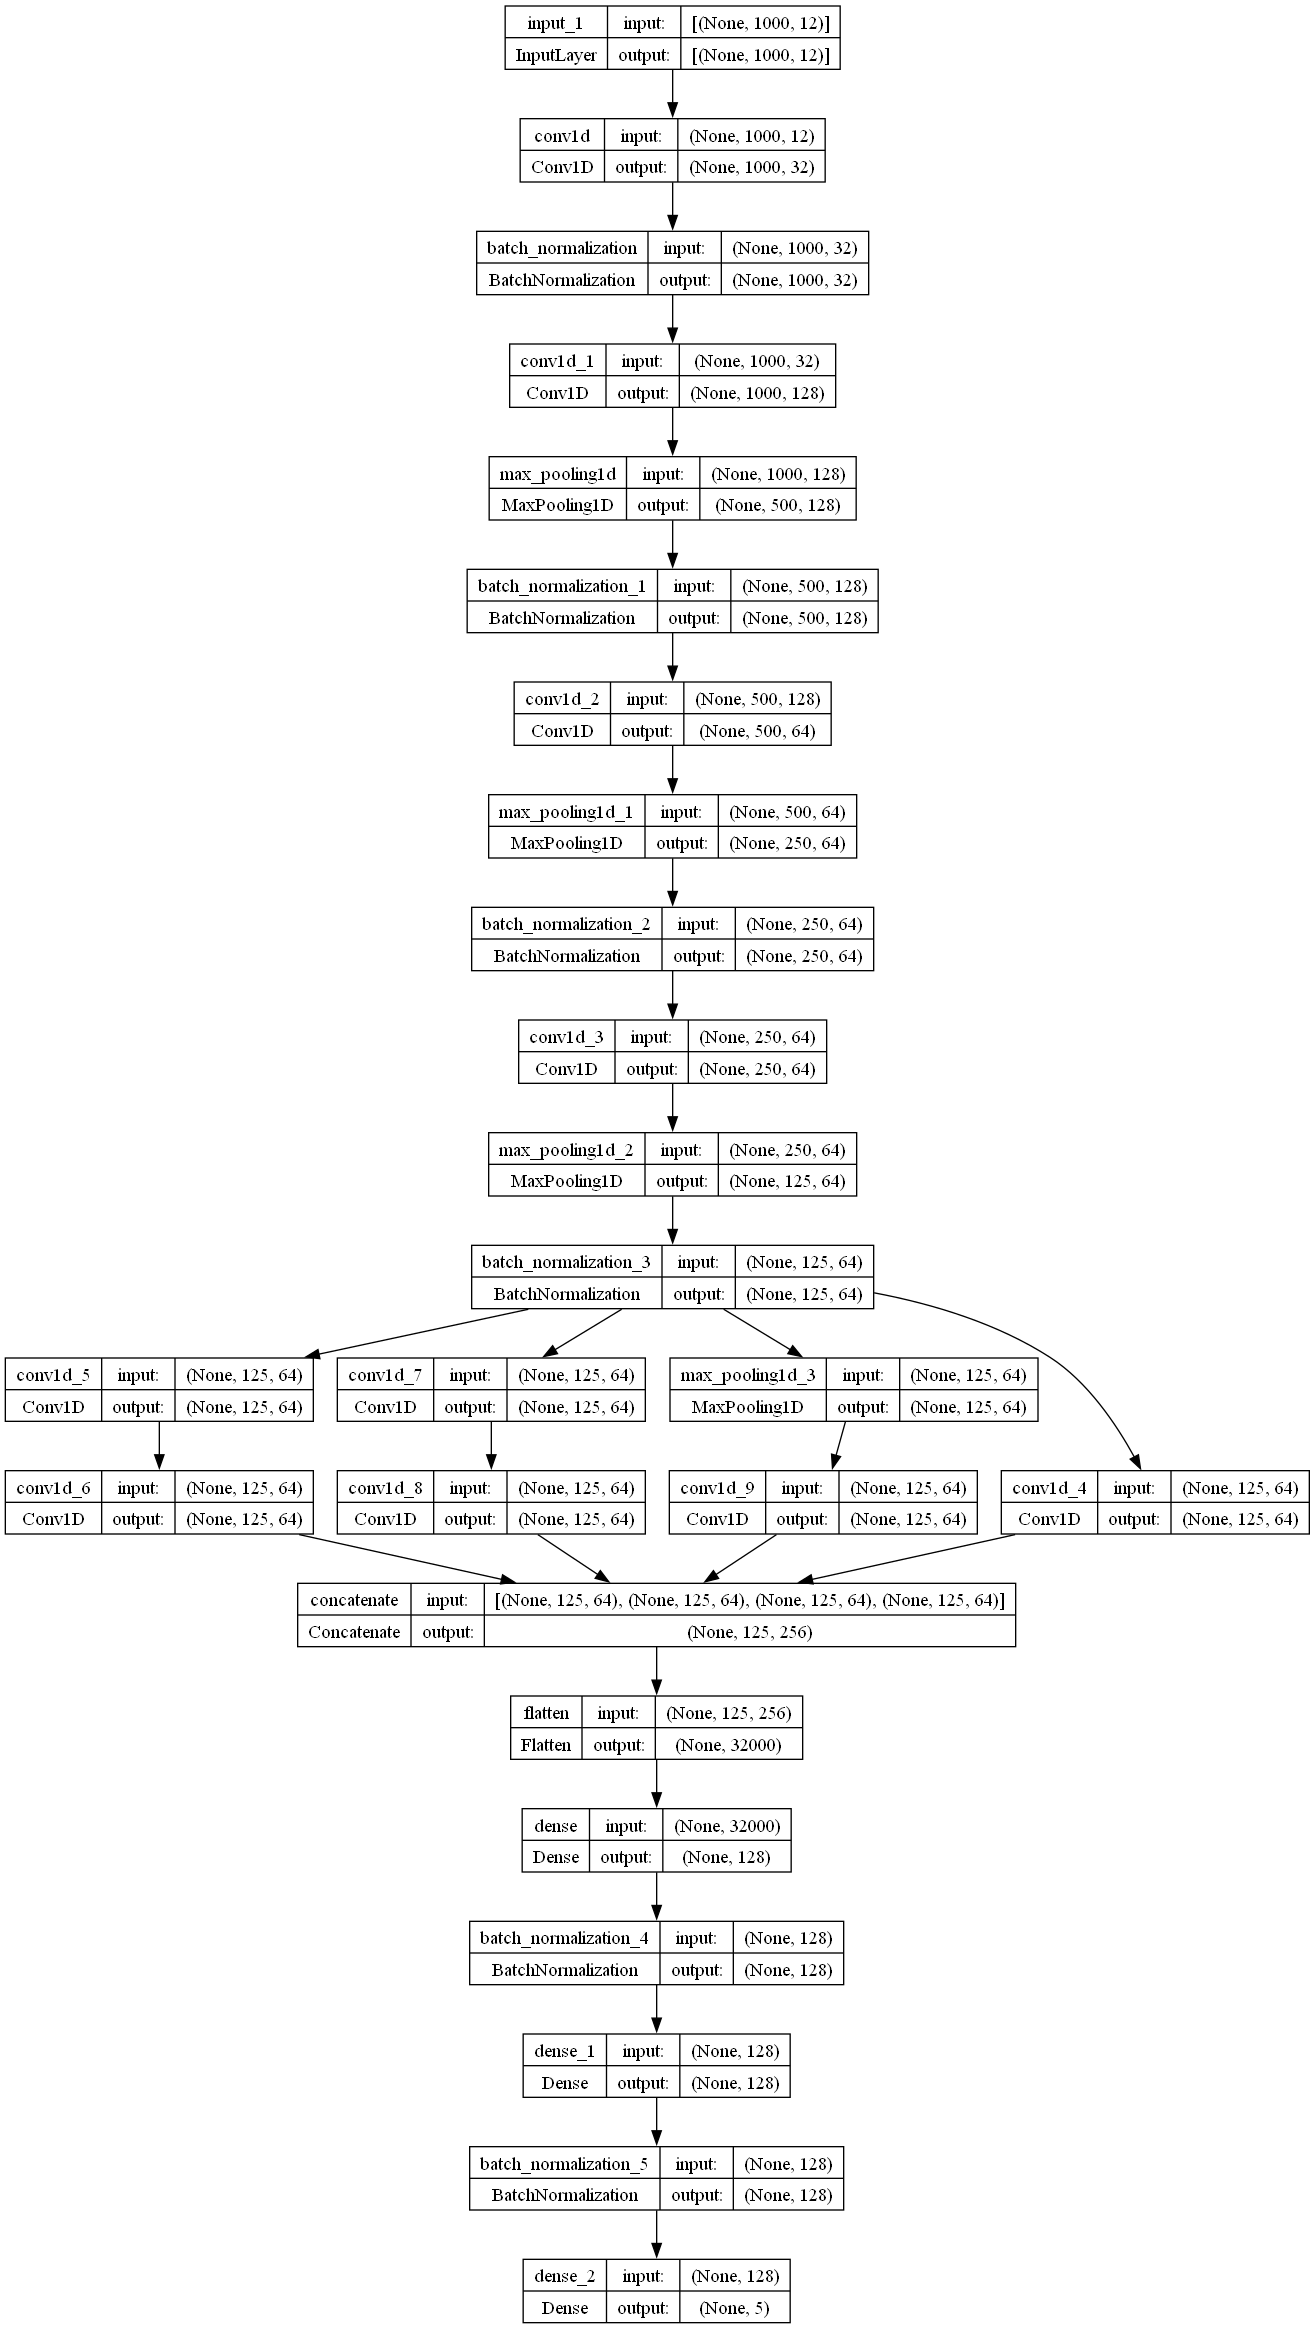

In [33]:
from tensorflow.keras.utils import plot_model

# 시각화
plot_model(model_with_batchnorm, to_file='inception_cnn_model_with_batchnorm.png', show_shapes=True, show_layer_names=True)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import BatchNormalization

# 모델 정의
model = Sequential()
model.add(Conv1D(50, 10, activation='relu', input_shape=(1000, 12)))  # 입력 형태를 맞춰줍니다.
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(Conv1D(150, 10, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(Conv1D(300, 10, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))  # 로짓 레이어의 출력 뉴런 수를 num_classes로 설정

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 991, 50)           6050      
                                                                 
 batch_normalization_6 (Bat  (None, 991, 50)           200       
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 495, 50)           0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 486, 150)          75150     
                                                                 
 batch_normalization_7 (Bat  (None, 486, 150)          600       
 chNormalization)                                                
                                                        

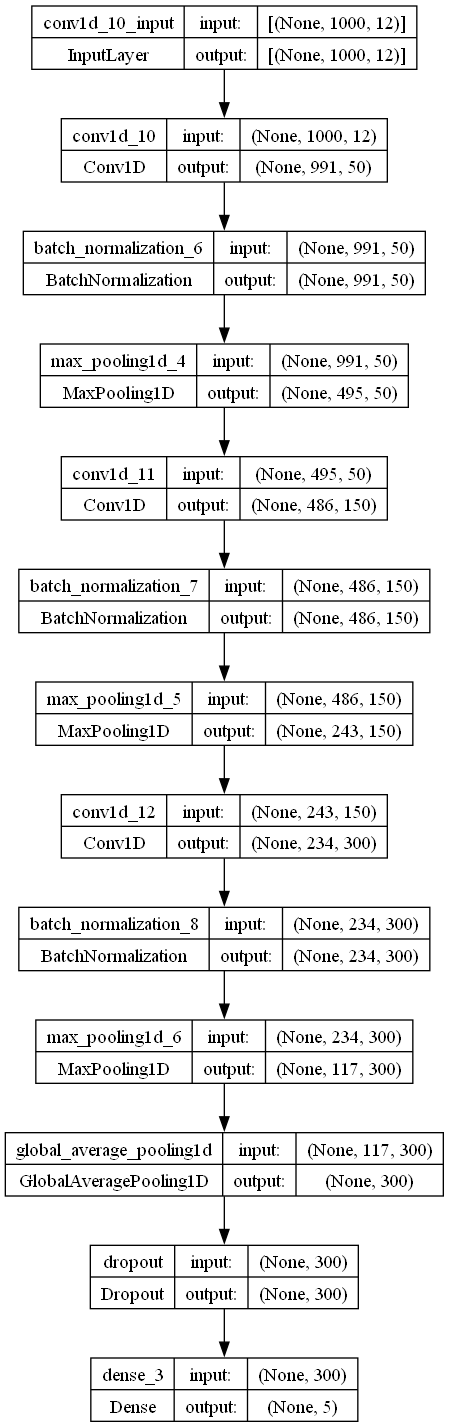

In [15]:
# 모델 구조 시각화 및 이미지 저장
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [21]:
import torch
import torch.nn as nn
from torchsummary import summary
from torchviz import make_dot

# Define the CustomCNN class
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv1d(12, 50, kernel_size=10),
            nn.BatchNorm1d(50),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(50, 150, kernel_size=10),
            nn.BatchNorm1d(150),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(150, 300, kernel_size=10),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(300, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.avg_pool(x).squeeze()
        x = self.dropout(x)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# Create an instance of the model
model = CustomCNN(num_classes)  # Replace 10 with the actual number of classes

# Print the model summary
summary(model, (12, input_length))  # Replace input_length with the actual input length

# Visualize the model graph
input_tensor = torch.randn(1, 12, input_length)  # Replace input_length with the actual input length
dot = make_dot(model(input_tensor), params=dict(model.named_parameters()))
dot.render("custom_cnn_model", format="png")  # Save the model graph as a PNG file


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 50, 991]           6,050
       BatchNorm1d-2              [-1, 50, 991]             100
              ReLU-3              [-1, 50, 991]               0
         MaxPool1d-4              [-1, 50, 495]               0
            Conv1d-5             [-1, 150, 486]          75,150
       BatchNorm1d-6             [-1, 150, 486]             300
              ReLU-7             [-1, 150, 486]               0
         MaxPool1d-8             [-1, 150, 243]               0
            Conv1d-9             [-1, 300, 234]         450,300
      BatchNorm1d-10             [-1, 300, 234]             600
             ReLU-11             [-1, 300, 234]               0
        MaxPool1d-12             [-1, 300, 117]               0
AdaptiveAvgPool1d-13               [-1, 300, 1]               0
          Dropout-14                  [

'custom_cnn_model.png'

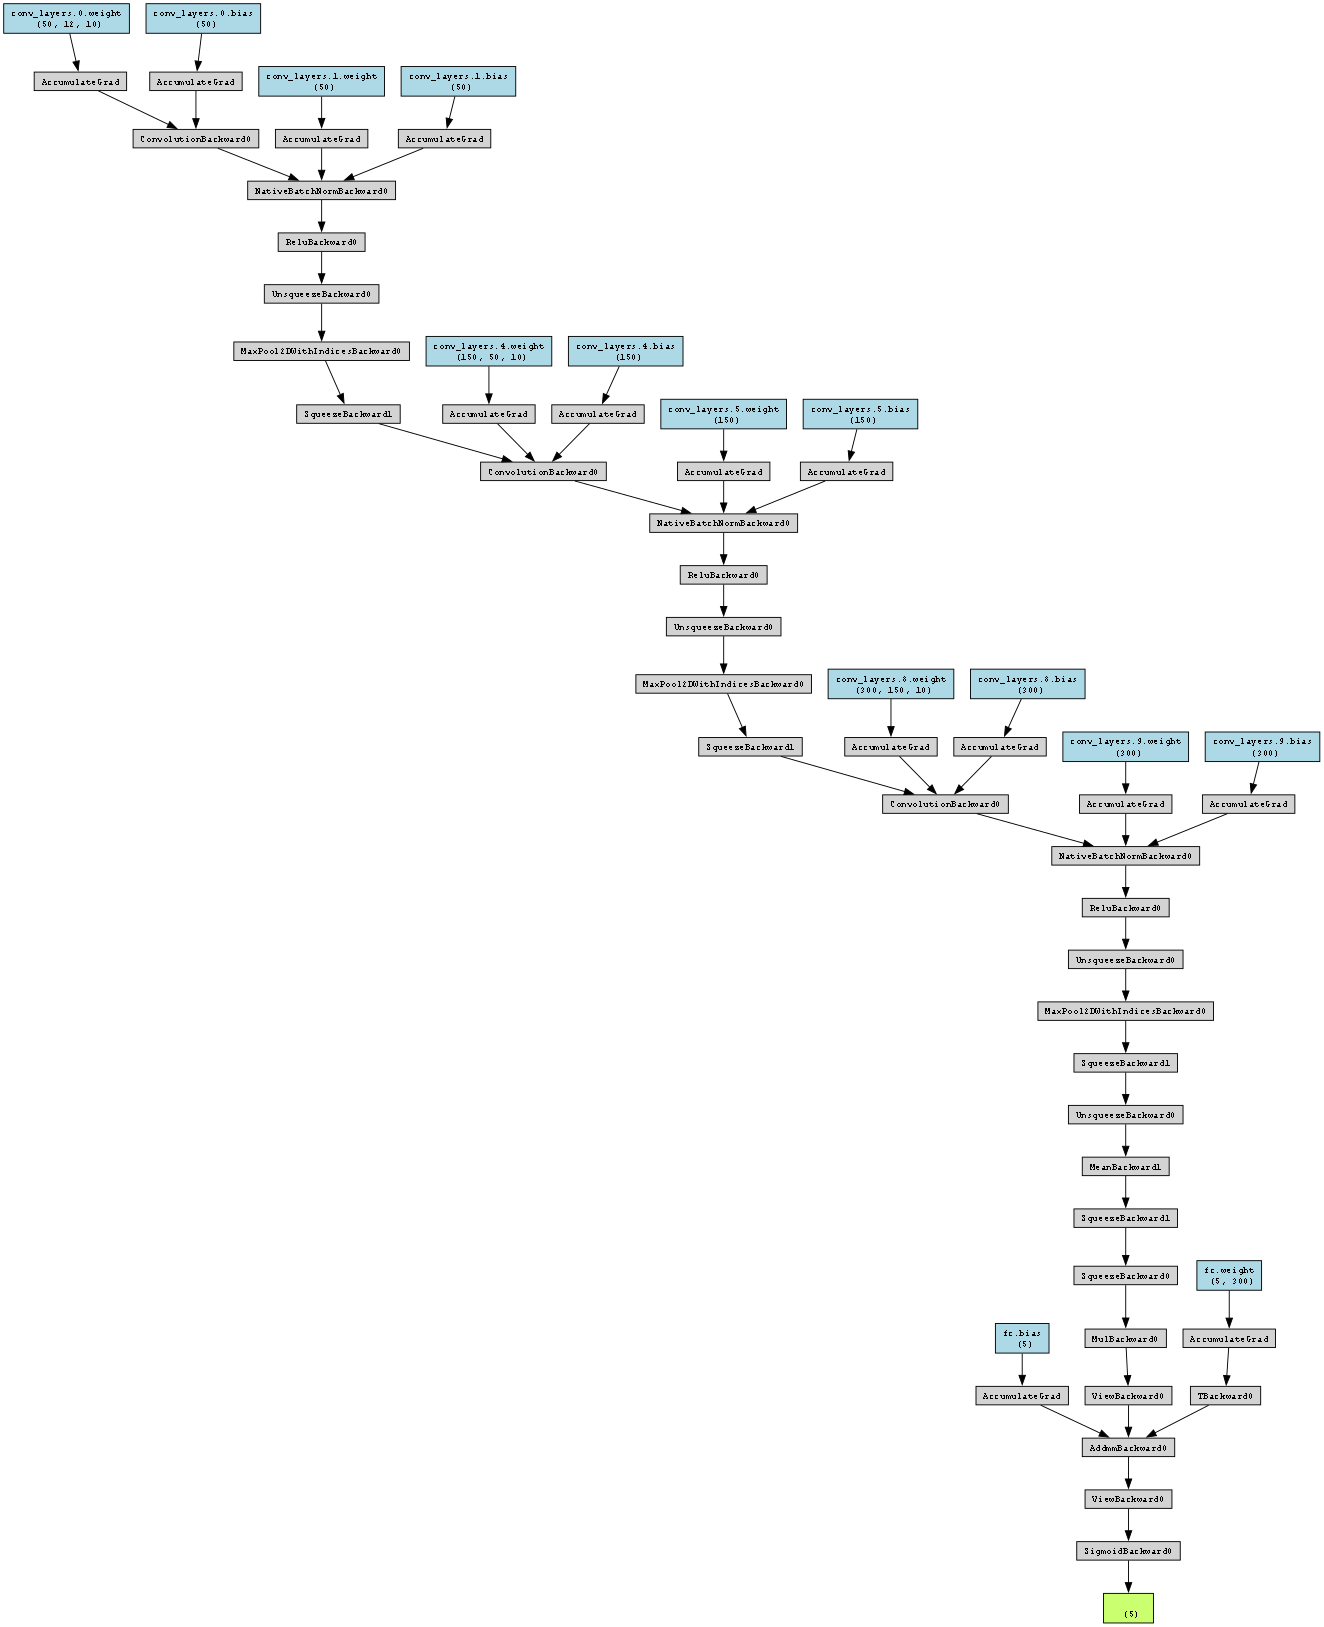

In [24]:
from IPython.display import Image

# Display the saved graph
Image('custom_cnn_model.png')
